In [8]:
using ITensors
using Zygote
using OptimKit

Let's start by creating some complex tensors

In [9]:
α = Index(2, "α")
β = Index(2, "β")
γ = Index(2, "γ")
σ = Index(2, "σ")
κ = Index(2, "κ");

In [10]:
A = randomITensor(ComplexF64, α, β, κ)
B = randomITensor(ComplexF64, α, γ)
C = randomITensor(ComplexF64, β, σ)
D = randomITensor(ComplexF64, γ, σ, κ);

Now let's define a "loss function". This function computes the norm of the contraction between A, B, C and D

In [11]:
f(A, B, C, D) = abs((A * B * C * D)[])

f (generic function with 1 method)

In [12]:
f(A, B, C, D)

5.813649634410897

In [13]:
∂f_∂A, ∂f_∂B, ∂f_∂C, ∂f_∂D = gradient(f, A, B, C, D);

Let's check the indices against what we would expect for each of the partials.\
For ∂f_∂A we would expect the result to have the indices of the result of contracting B, C and D, so $\alpha$, $\beta$ and $\kappa$

In [14]:
inds(B * C * D)

((dim=2|id=397|"α"), (dim=2|id=493|"β"), (dim=2|id=20|"κ"))

In [15]:
inds(∂f_∂A)

((dim=2|id=20|"κ"), (dim=2|id=493|"β"), (dim=2|id=397|"α"))

Now let's compare values. We expect the gradient to be the same as the modulus of the contraction between B, C and D

In [448]:
@show ∂f_∂A

∂f_∂A = ITensor ord=3
Dim 1: (dim=2|id=200|"κ")
Dim 2: (dim=2|id=113|"β")
Dim 3: (dim=2|id=320|"α")
NDTensors.Dense{ComplexF64, Vector{ComplexF64}}
 2×2×2
[:, :, 1] =
 -0.06528775584528888 + 0.14272501298176352im  -0.26228088237277514 + 1.351725219479923im
  -1.2808586099264392 + 1.7236923592204247im      2.249664280279249 + 1.2605343512428075im

[:, :, 2] =
 -0.9654125662653802 + 2.4130325717183854im  -1.2824934698625519 + 0.23242635109523654im
  -3.163650922238655 + 2.7185981378749253im   1.2711586793082972 - 0.7229145858636825im


ITensor ord=3 (dim=2|id=200|"κ") (dim=2|id=113|"β") (dim=2|id=320|"α")
NDTensors.Dense{ComplexF64, Vector{ComplexF64}}

In [449]:
@show (D * C * B)

D * C * B = ITensor ord=3
Dim 1: (dim=2|id=200|"κ")
Dim 2: (dim=2|id=113|"β")
Dim 3: (dim=2|id=320|"α")
NDTensors.Dense{ComplexF64, Vector{ComplexF64}}
 2×2×2
[:, :, 1] =
 0.023466710296960604 + 0.15518451566376446im  -0.12003727901876574 + 1.3716936180802397im
   0.7567536212904787 + 2.00973582456036im      -2.5097816835811635 + 0.592395244231396im

[:, :, 2] =
 0.2636992137887166 + 2.5855773707093292im   1.1689264733239058 + 0.5765608457795847im
  2.292836953253249 + 3.4845891721743705im  -1.0229800836116942 - 1.044969681363572im


ITensor ord=3 (dim=2|id=200|"κ") (dim=2|id=113|"β") (dim=2|id=320|"α")
NDTensors.Dense{ComplexF64, Vector{ComplexF64}}

For ∂f_∂B we would contract A, C and D, giving us a tensor with indices $\alpha$, $\gamma$

In [450]:
inds(A * C * D)

((dim=2|id=320|"α"), (dim=2|id=580|"γ"))

In [451]:
inds(∂f_∂B)

((dim=2|id=320|"α"), (dim=2|id=580|"γ"))

-----

In [452]:
lr = 0.01

0.01

In [453]:
# make manual updates to the tensors using the grads
A -= lr * ∂f_∂A
B -= lr * ∂f_∂B
C -= lr * ∂f_∂C
D -= lr * ∂f_∂D

ITensor ord=3 (dim=2|id=580|"γ") (dim=2|id=793|"σ") (dim=2|id=200|"κ")
NDTensors.Dense{ComplexF64, Vector{ComplexF64}}

In [454]:
f(A, B, C, D)

2.9779075822205976

Do another step:

In [455]:
∂f_∂A, ∂f_∂B, ∂f_∂C, ∂f_∂D = gradient(f, A, B, C, D);

In [456]:
A -= lr * ∂f_∂A
B -= lr * ∂f_∂B
C -= lr * ∂f_∂C
D -= lr * ∂f_∂D

ITensor ord=3 (dim=2|id=580|"γ") (dim=2|id=793|"σ") (dim=2|id=200|"κ")
NDTensors.Dense{ComplexF64, Vector{ComplexF64}}

In [457]:
f(A, B, C, D)

2.0609588190302386

In [458]:
∂f_∂A, ∂f_∂B, ∂f_∂C, ∂f_∂D = gradient(f, A, B, C, D);

In [459]:
A -= lr * ∂f_∂A
B -= lr * ∂f_∂B
C -= lr * ∂f_∂C
D -= lr * ∂f_∂D

ITensor ord=3 (dim=2|id=580|"γ") (dim=2|id=793|"σ") (dim=2|id=200|"κ")
NDTensors.Dense{ComplexF64, Vector{ComplexF64}}

In [460]:
f(A, B, C, D)

1.176487837295402

In [461]:
#y, ∇ = withgradient(f, A, B, C, D);

In [462]:
# make a loop
A = randomITensor(ComplexF64, α, β, κ)
B = randomITensor(ComplexF64, α, γ)
C = randomITensor(ComplexF64, β, σ)
D = randomITensor(ComplexF64, γ, σ, κ);
lr = 0.001
f(A, B, C, D) = abs((A * B * C * D)[])
n_steps = 10000
loss_per_step = Vector{Float64}(undef, n_steps)
for i=1:n_steps
    func_eval, ∇ = withgradient(f, A, B, C, D);
    loss_per_step[i] = func_eval
    ∂f_∂A, ∂f_∂B, ∂f_∂C, ∂f_∂D = ∇
    A -= lr * ∂f_∂A
    B -= lr * ∂f_∂B
    C -= lr * ∂f_∂C
    D -= lr * ∂f_∂D
end

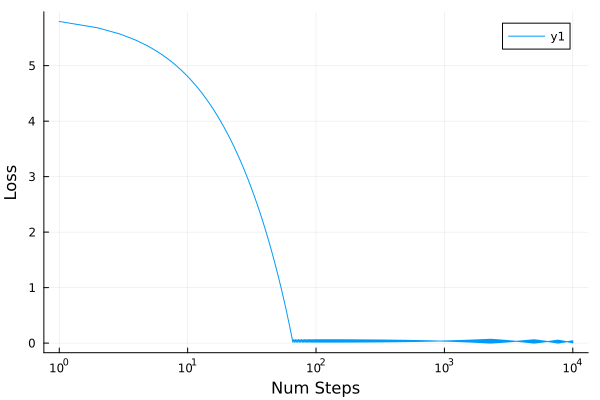

In [463]:
plot(collect(1:n_steps),loss_per_step, xaxis=:log10, xlabel="Num Steps", ylabel="Loss")

# Make an MPS

In [487]:
using Random

In [488]:
s = siteinds("S=1/2", 2)

2-element Vector{Index{Int64}}:
 (dim=2|id=743|"S=1/2,Site,n=1")
 (dim=2|id=717|"S=1/2,Site,n=2")

In [491]:
Random.seed!(42);

In [492]:
mps = randomMPS(ComplexF64, s; linkdims=2)

MPS
[1] ((dim=2|id=743|"S=1/2,Site,n=1"), (dim=2|id=196|"Link,l=1"))
[2] ((dim=2|id=196|"Link,l=1"), (dim=2|id=717|"S=1/2,Site,n=2"))


Make a product state

In [493]:
ps = randomMPS(ComplexF64, s; linkdims=1)

MPS
[1] ((dim=2|id=743|"S=1/2,Site,n=1"), (dim=1|id=676|"Link,l=1"))
[2] ((dim=1|id=676|"Link,l=1"), (dim=2|id=717|"S=1/2,Site,n=2"))


In [494]:
res = 1
for i=1:2
    res *= mps[i] * conj(ps[i])
end

In [495]:
@show res

res = ITensor ord=0
NDTensors.Dense{ComplexF64, Vector{ComplexF64}}
 0-dimensional
-0.3230742666227711 + 0.49287019317044356im


ITensor ord=0
NDTensors.Dense{ComplexF64, Vector{ComplexF64}}

In [496]:
abs(res[])

0.5893199547526893

In [497]:
abs(inner(ps, mps))

0.5893199547526893

In [500]:
function loss(mps)
    res = 1
    for i=1:2
        res *= mps[i] * conj(ps[i])
    end
    return -abs(res[])
end

loss (generic function with 1 method)

In [501]:
loss(mps)

-0.5893199547526893

In [502]:
out, = gradient(loss, mps)

((data = ITensor[ITensor ord=2
Dim 1: (dim=2|id=196|"Link,l=1")
Dim 2: (dim=2|id=743|"S=1/2,Site,n=1")
NDTensors.Dense{ComplexF64, Vector{ComplexF64}}
 2×2
 -0.04556994125651116 + 0.44610932992810465im  …  -0.15636523415790643 - 0.586215534397828im
    0.250568515652599 + 0.29902799533294855im      -0.4604375679337606 - 0.2580814406121487im, ITensor ord=2
Dim 1: (dim=2|id=196|"Link,l=1")
Dim 2: (dim=2|id=717|"S=1/2,Site,n=2")
NDTensors.Dense{ComplexF64, Vector{ComplexF64}}
 2×2
    0.111462679600072 + 0.12468696271352354im  …  -0.017642032121394202 - 0.4199717260649778im
 -0.15991873386404543 + 0.09131315474109873im       0.45627008763157983 + 0.0776893728844122im], llim = nothing, rlim = nothing),)

In [503]:
out[1][1]

ITensor ord=2 (dim=2|id=196|"Link,l=1") (dim=2|id=743|"S=1/2,Site,n=1")
NDTensors.Dense{ComplexF64, Vector{ComplexF64}}

In [504]:
out[1][2]

ITensor ord=2 (dim=2|id=196|"Link,l=1") (dim=2|id=717|"S=1/2,Site,n=2")
NDTensors.Dense{ComplexF64, Vector{ComplexF64}}

In [505]:
s1_old = mps[1]
s2_old = mps[2]

ITensor ord=2 (dim=2|id=196|"Link,l=1") (dim=2|id=717|"S=1/2,Site,n=2")
NDTensors.Dense{ComplexF64, Vector{ComplexF64}}

In [506]:
s1_new = s1_old - 0.1 * out[1][1]
s2_new = s2_old - 0.1 * out[1][2]

ITensor ord=2 (dim=2|id=196|"Link,l=1") (dim=2|id=717|"S=1/2,Site,n=2")
NDTensors.Dense{ComplexF64, Vector{ComplexF64}}

In [508]:
mps[1] = s1_new
mps[2] = s2_new

ITensor ord=2 (dim=2|id=196|"Link,l=1") (dim=2|id=717|"S=1/2,Site,n=2")
NDTensors.Dense{ComplexF64, Vector{ComplexF64}}

In [509]:
loss(mps)

-0.7404919927803835

Go again? 

In [514]:
out, = gradient(loss, mps)

((data = ITensor[ITensor ord=2
Dim 1: (dim=2|id=196|"Link,l=1")
Dim 2: (dim=2|id=743|"S=1/2,Site,n=1")
NDTensors.Dense{ComplexF64, Vector{ComplexF64}}
 2×2
 -0.06033751208091207 + 0.46858066914793495im  …  -0.14846367066234278 - 0.6217275838458168im
   0.2781645238174703 + 0.3097557816104692im       -0.5004945974601719 - 0.25841396493898555im, ITensor ord=2
Dim 1: (dim=2|id=196|"Link,l=1")
Dim 2: (dim=2|id=717|"S=1/2,Site,n=2")
NDTensors.Dense{ComplexF64, Vector{ComplexF64}}
 2×2
  0.11835904980394596 + 0.15171202453687058im  …  0.01206531695983152 - 0.48346541435127693im
 -0.17258929251166735 + 0.11200733456107347im      0.5138876249827122 + 0.05770091810295324im], llim = nothing, rlim = nothing),)

In [515]:
s1_old = mps[1]
s2_old = mps[2]
s1_new = s1_old - 0.1 * out[1][1]
s2_new = s2_old - 0.1 * out[1][2]

ITensor ord=2 (dim=2|id=196|"Link,l=1") (dim=2|id=717|"S=1/2,Site,n=2")
NDTensors.Dense{ComplexF64, Vector{ComplexF64}}

In [516]:
mps[1] = s1_new
mps[2] = s2_new

ITensor ord=2 (dim=2|id=196|"Link,l=1") (dim=2|id=717|"S=1/2,Site,n=2")
NDTensors.Dense{ComplexF64, Vector{ComplexF64}}

In [517]:
loss(mps)

-0.918201337763264

And again...

In [518]:
out, = gradient(loss, mps)

((data = ITensor[ITensor ord=2
Dim 1: (dim=2|id=196|"Link,l=1")
Dim 2: (dim=2|id=743|"S=1/2,Site,n=1")
NDTensors.Dense{ComplexF64, Vector{ComplexF64}}
 2×2
 -0.07556078231787806 + 0.49551310166704626im  …  -0.14212575950835823 - 0.6631017886377839im
   0.3082662171388676 + 0.3234738478413193im       -0.5451560026659208 - 0.2613273036719438im, ITensor ord=2
Dim 1: (dim=2|id=196|"Link,l=1")
Dim 2: (dim=2|id=717|"S=1/2,Site,n=2")
NDTensors.Dense{ComplexF64, Vector{ComplexF64}}
 2×2
 0.12637004680382066 + 0.17998395598735278im  …  0.04159624571984319 - 0.5511588198982258im
 -0.1868590384979298 + 0.13361464592845923im      0.5760678632101607 + 0.03848935705033842im], llim = nothing, rlim = nothing),)

In [519]:
s1_old = mps[1]
s2_old = mps[2]
s1_new = s1_old - 0.1 * out[1][1]
s2_new = s2_old - 0.1 * out[1][2]
mps[1] = s1_new
mps[2] = s2_new

ITensor ord=2 (dim=2|id=196|"Link,l=1") (dim=2|id=717|"S=1/2,Site,n=2")
NDTensors.Dense{ComplexF64, Vector{ComplexF64}}

In [520]:
loss(mps)

-1.1290105001577393

In [521]:
normalize!(mps)

MPS
[1] ((dim=2|id=743|"S=1/2,Site,n=1"), (dim=2|id=196|"Link,l=1"))
[2] ((dim=2|id=196|"Link,l=1"), (dim=2|id=717|"S=1/2,Site,n=2"))


make a loop